<a href="https://colab.research.google.com/github/baswarajsajjan/churn-prediction-model/blob/main/Copy_of_Used_Car_Price_Estimation_for_AutoMart_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
file_path = "/content/Used Car Price Estimation for AutoMart India (1).csv"
df = pd.read_csv(file_path)
df.head()

,car_make,car_model,year_of_manufacture,kms_driven,fuel_type,transmission,owner_type,engine_cc,mileage_kmpl,car_condition_score,estimated_price_in_inr
0,Maruti,Tiago,2018,47998.0,Petrol,Manual,First,866.0,22.36,4.42,417505.0
1,Honda,Innova,2021,42365.0,CNG,Manual,Second,1159.0,20.40,9.66,505652.0
2,Tata,Innova,2021,46442.0,CNG,Manual,First,1796.0,16.94,9.78,499572.0
3,Tata,EcoSport,2019,41307.0,Petrol,Manual,Second,1303.0,14.88,5.67,456022.0
4,Maruti,EcoSport,2015,104373.0,CNG,Manual,First,1431.0,18.75,4.49,400376.0


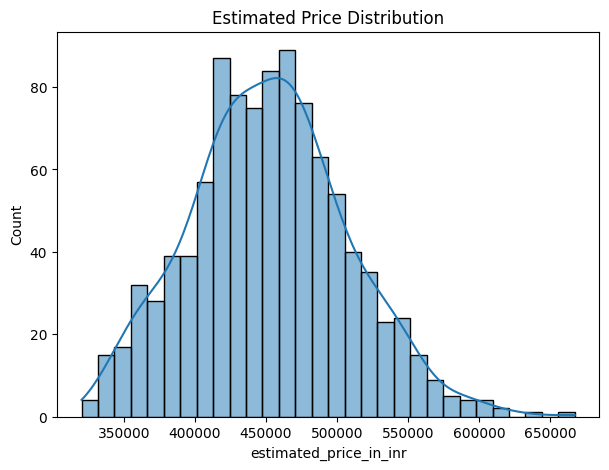

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(df['estimated_price_in_inr'], bins=30, kde=True)
plt.title('Estimated Price Distribution')
plt.show()

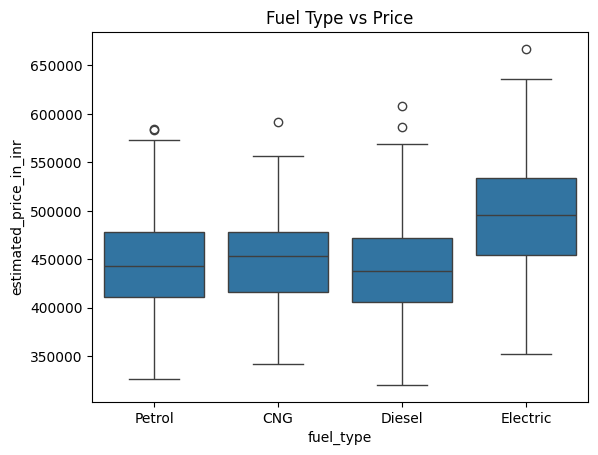

In [ ]:
sns.boxplot(data=df, x='fuel_type', y='estimated_price_in_inr')
plt.title('Fuel Type vs Price')
plt.show()

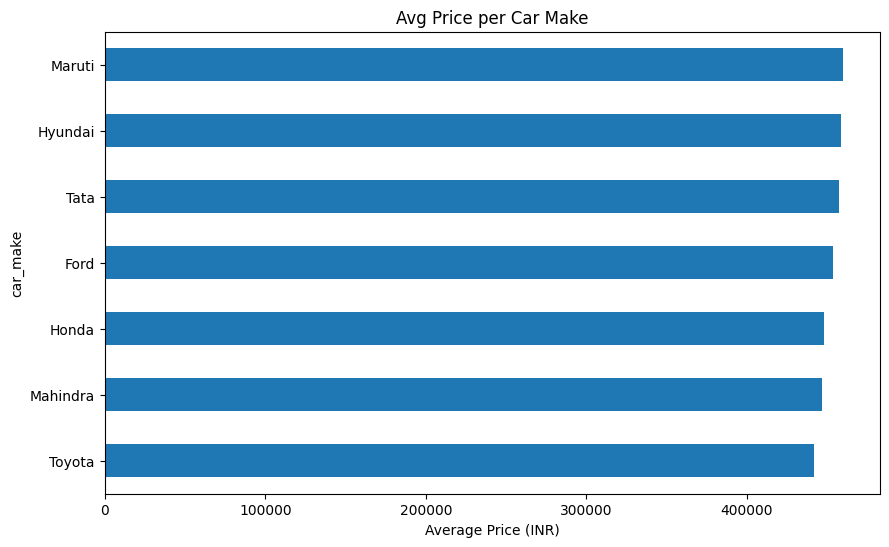

In [ ]:
avg_price = df.groupby('car_make')['estimated_price_in_inr'].mean().sort_values()
avg_price.plot(kind='barh', figsize=(10,6), title='Avg Price per Car Make')
plt.xlabel('Average Price (INR)')
plt.show()

In [ ]:
X = df.drop(columns=['estimated_price_in_inr'])
y = df['estimated_price_in_inr']

In [ ]:
cat_features = ['car_make', 'car_model', 'fuel_type', 'transmission', 'owner_type']
num_features = ['year_of_manufacture', 'kms_driven', 'engine_cc', 'mileage_kmpl', 'car_condition_score']



In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('num', StandardScaler(), num_features)
])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['car_make', 'car_model',
                                                   'fuel_type', 'transmission',
                                                   'owner_type']),
                                                 ('num', StandardScaler(),
                                                  ['year_of_manufacture',
                                                   'kms_driven', 'engine_cc',
                                                   'mileage_kmpl',
                                                   'car_condition_score'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.7024626254510138
MAE: 24387.9706


In [ ]:
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']

In [ ]:
print("Enter Car Details to Predict Estimated Price:\n")

car_make = input("Car Make (e.g. Maruti, Honda): ")
car_model = input("Car Model (e.g. Swift, Tiago): ")
year_of_manufacture = int(input("Year of Manufacture (e.g. 2018): "))
kms_driven = float(input("KMs Driven (e.g. 45000): "))
fuel_type = input("Fuel Type (Petrol, Diesel, CNG, Electric): ")
transmission = input("Transmission (Manual/Automatic): ")
owner_type = input("Owner Type (First, Second, etc.): ")
engine_cc = float(input("Engine CC (e.g. 1197): "))
mileage_kmpl = float(input("Mileage in KMPL (e.g. 20.4): "))
car_condition_score = float(input("Car Condition Score (0 to 10): "))

Enter Car Details to Predict Estimated Price:

Car Make (e.g. Maruti, Honda): maruti
Car Model (e.g. Swift, Tiago): swift
Year of Manufacture (e.g. 2018): 2019
KMs Driven (e.g. 45000): 42000
Fuel Type (Petrol, Diesel, CNG, Electric): petrol
Transmission (Manual/Automatic): manual
Owner Type (First, Second, etc.): first
Engine CC (e.g. 1197): 1197
Mileage in KMPL (e.g. 20.4): 20
Car Condition Score (0 to 10): 7


In [ ]:
input_data = pd.DataFrame([{
    'car_make': car_make,
    'car_model': car_model,
    'year_of_manufacture': year_of_manufacture,
    'kms_driven': kms_driven,
    'fuel_type': fuel_type,
    'transmission': transmission,
    'owner_type': owner_type,
    'engine_cc': engine_cc,
    'mileage_kmpl': mileage_kmpl,
    'car_condition_score': car_condition_score
}])

In [ ]:
predicted_price = model.predict(input_data)[0]
print(f"\nEstimated Price: ₹{predicted_price:,.0f}")


Estimated Price: ₹499,405
